# <span style="color:blue"> Importing Libraries</span>

In [1]:
import pandas as pd
import numpy as np

# PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Kmeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from collections import Counter

# For visualization
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# <span style="color:blue">Loadings Datasets </span>

In [2]:
df = pd.read_csv('Country-data.csv')
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


# <span style="color:blue">PCA </span>

In [3]:
# List of attributes less than "country"#
col_name = [x for x in df.columns if x not in ['country']]

In [4]:
# Execute PCA (w/o limits on n_components)
pca = PCA()
_ = pca.fit_transform(df[col_name])
PC_components = np.arange(pca.n_components_) + 1

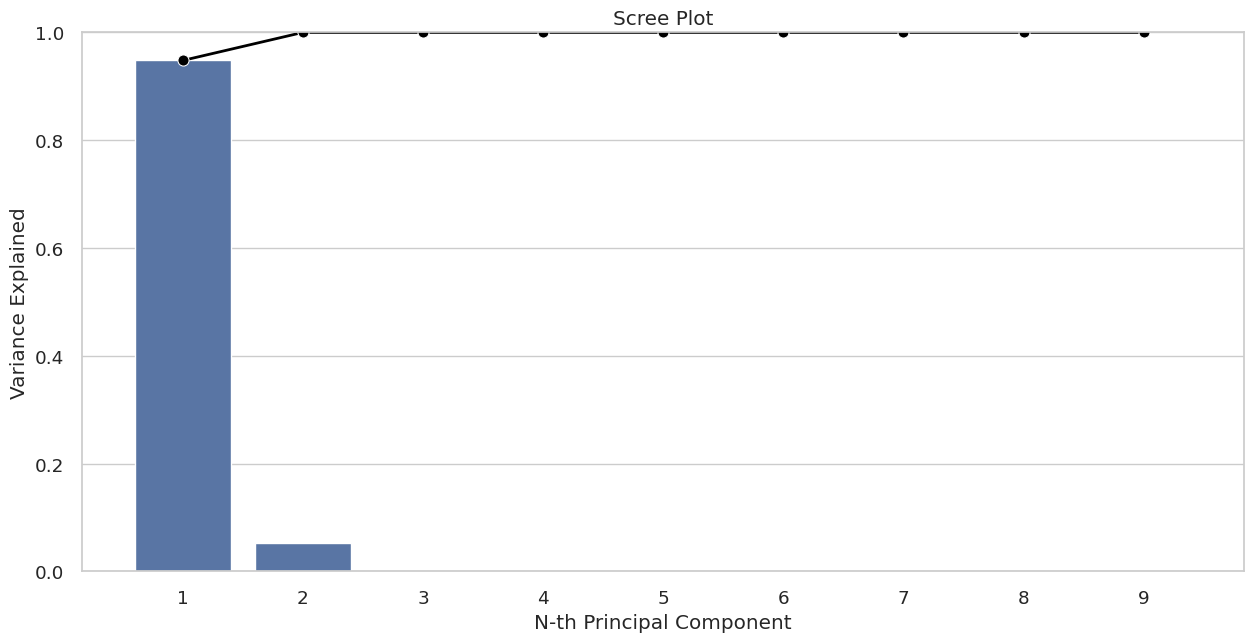

In [5]:
# Graphic to choose number of main components
_ = sns.set(style='whitegrid', font_scale=1.2)
fig, ax = plt.subplots(figsize=(15, 7))
_ = sns.barplot(x=PC_components, y=pca.explained_variance_ratio_, color='b')
_ = sns.lineplot(x=PC_components-1, y=np.cumsum(pca.explained_variance_ratio_), color='black', linestyle='-', linewidth=2, marker='o', markersize=8)

plt.title('Scree Plot')
plt.xlabel('N-th Principal Component')
plt.ylabel('Variance Explained')
plt.ylim(0, 1)
plt.show()

> From the graph we realize that we can use **2** main components instead of 9

<Figure size 1500x800 with 0 Axes>

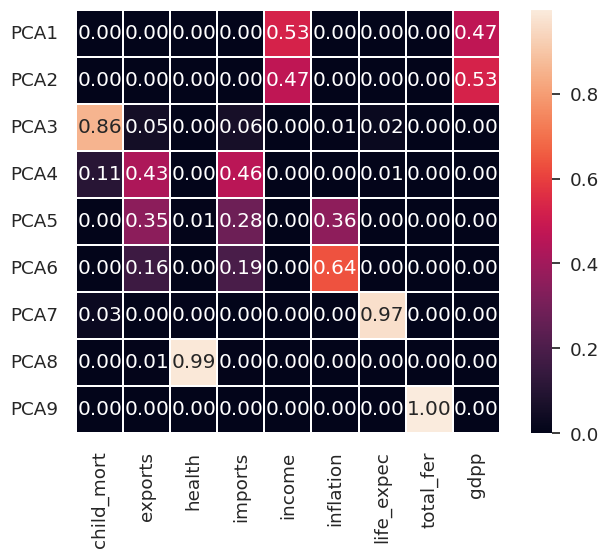

<Figure size 1500x800 with 0 Axes>

In [6]:
# Heat map
_ = sns.heatmap(pca.components_**2,
                 yticklabels=["PCA"+str(x) for x in range(1,pca.n_components_+1)],
                 xticklabels=list(col_name),
                 annot=True,
                 fmt='.2f',
                 square=True,
                 linewidths=0.05,
                 cbar_kws={"orientation": "vertical"})
plt.figure(figsize = (15,8))

In [7]:
# Execute PCA (Escogemos mantener n_components)
pca = PCA(n_components=2)
pca_array = pca.fit_transform(df[col_name])

# Convert to Dataframe again to read
df_pca = pd.DataFrame(data=pca_array)
df_pca.columns = ['PC' + str(col+1) for col in df_pca.columns.values]

df_pca.head()

,PC1,PC2
0,-19815.128018,-1651.124720
1,-11338.938992,1493.469028
2,-8926.352589,3264.684102
3,-14652.465937,-867.795270
4,896.142032,1898.478151


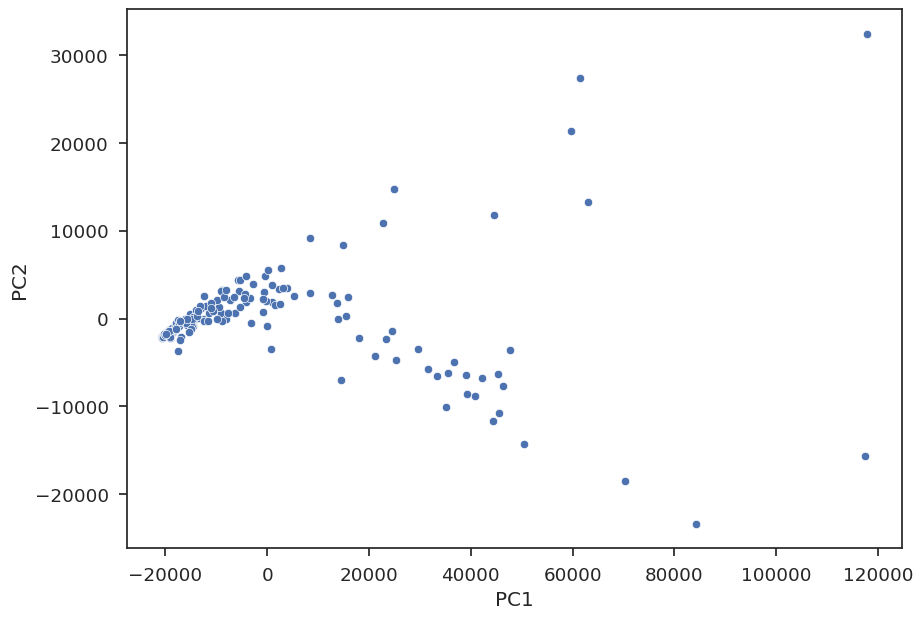

In [8]:
# Main components -plot
_ = sns.set(style='ticks', font_scale=1.2)
fig, ax = plt.subplots(figsize=(10, 7))
_ = sns.scatterplot(data=df_pca, x='PC1', y='PC2')

# <span style="color:blue">Clustering </span>

**Aplicando Kmeans**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

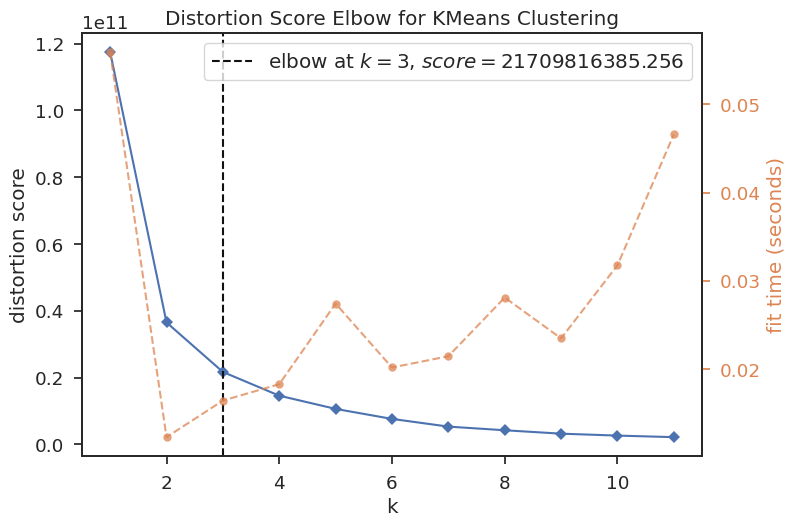

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [9]:
# Applying the "ElBow" method#
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12)).fit(df_pca)
visualizer.show()

> According to the previous graph, the optimal number of clusters **(K) is 3**.


In [10]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=0).fit(df_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [11]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 2, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 1, 1, 0, 2, 1, 1, 1, 1, 1, 1, 2, 0, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 0, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [12]:
kmeans.inertia_

21709816385.25594

In [13]:
kmeans.n_iter_

11

In [14]:
kmeans.cluster_centers_

array([[ 81976.99353492,   5272.3930453 ],
       [-12088.57747102,    305.55829379],
       [ 30421.84254831,  -2375.56915383]])

In [15]:
# Amount of elements of each cluster
Counter(kmeans.labels_)

Counter({1: 128, 2: 32, 0: 7})

In [16]:
# Adding the cluster number of each element of the data
df_c = df.assign(cluster = kmeans.labels_)
df_c

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,1
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,1
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,1
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,1


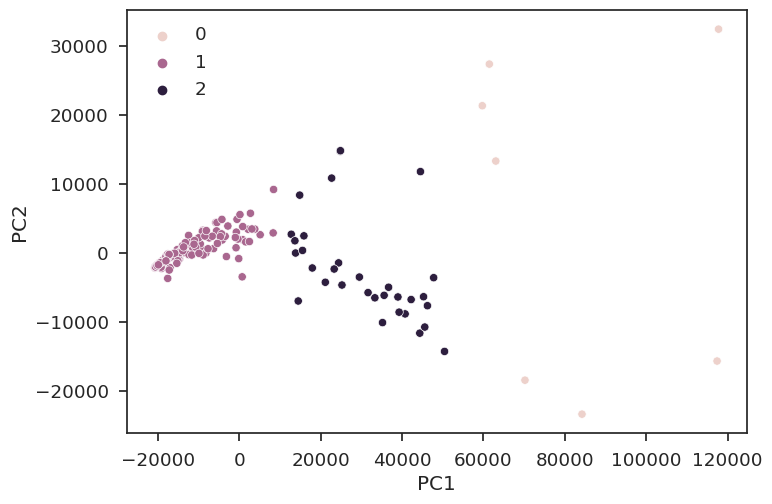

In [17]:
# 2D visualization of the clusterization of the attributes according to the cluster to which it belongs
sns.scatterplot(data=df_pca, x="PC1", y="PC2", hue=kmeans.labels_)
plt.show()

In [18]:
# Corresponding information according to Cluster
df_c.groupby('cluster').describe()

child_mort                                                           \
             count       mean        std  min     25%    50%     75%    max   
cluster                                                                       
0              7.0   6.228571   3.707971  2.8   3.000   4.50   9.750   10.8   
1            128.0  47.389844  40.972276  4.5  16.575  30.75  68.075  208.0   
2             32.0   8.800000  18.906715  2.6   3.875   4.25   6.350  111.0   

        exports             ... total_fer         gdpp                \
          count       mean  ...       75%   max  count          mean   
cluster                     ...                                        
0           7.0  96.442857  ...    2.0100  2.21    7.0  65442.857143   
1         128.0  35.865617  ...    4.6025  7.49  128.0   4438.390625   
2          32.0  49.978125  ...    2.0350  5.21   32.0  35587.500000   

                                                                     
                  std      min      25%      50%      75%       max  
cluster                                                              
0        26336.340998  35300.0  42550.0  70300.0  81200.0  105000.0  
1         4100.482425    231.0   1030.0   3075.0   6567.5   16600.0  
2        12060.245276  17100.0  23175.0  35400.0  46375.0   58000.0  

[3 rows x 72 columns]

In [19]:
# Information corresponding to the average according to cluster
df_c.groupby('cluster').mean()

<ipython-input-19-5f11f193ddf2>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_c.groupby('cluster').mean()


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
cluster,,,,,,,,,
0,6.228571,96.442857,5.712857,68.571429,80342.857143,6.388714,80.285714,1.767143,65442.857143
1,47.389844,35.865617,6.332031,45.921609,8569.242188,8.957648,67.873437,3.263359,4438.390625
2,8.800000,49.978125,8.991563,46.021875,37621.875000,3.383312,79.156250,1.944687,35587.500000


In [20]:
# Information corresponding to the standard deviation according to cluster
df_c.groupby('cluster').std()

<ipython-input-20-dc6c0d79100e>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_c.groupby('cluster').std()


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
cluster,,,,,,,,,
0,3.707971,63.326478,3.829194,62.521269,22950.733986,5.999308,2.087605,0.362248,26336.340998
1,40.972276,19.240987,2.348954,19.737419,6833.699409,11.361343,8.259192,1.555788,4100.482425
2,18.906715,29.064708,2.972031,25.984024,7646.619931,6.037584,3.970450,0.752132,12060.245276


**Observations:**

From the results it is obtained that at the average level in the countries:

Cluster 0 has a low infant mortality, medium inflation, a high life expectancy and a high GDP.

Cluster 1 has a very high infant mortality, high inflation, a low life expectancy and a low GDP.

Cluster 2 has a medium infant mortality, low inflation, a half -life expectancy and an middle GDP.


**Conclusion:**

> ***Cluster 1 countries need the highest priority.***

In [21]:
# Cluster 1 countries
df_c[(df_c['cluster']== 1)]['country']

0              Afghanistan
1                  Albania
2                  Algeria
3                   Angola
4      Antigua and Barbuda
              ...         
162                Vanuatu
163              Venezuela
164                Vietnam
165                  Yemen
166                 Zambia
Name: country, Length: 128, dtype: object

In [23]:
print("------ Countries with very high infant mortality, high inflation, a low life expectancy and a low GDP--------------- ")
for country in df_c[(df_c['cluster']== 1)]['country']:
  print(country)

------ Countries with very high infant mortality, high inflation, a low life expectancy and a low GDP--------------- 
Afghanistan
Albania
Algeria
Angola
Antigua and Barbuda
Argentina
Armenia
Azerbaijan
Bangladesh
Barbados
Belarus
Belize
Benin
Bhutan
Bolivia
Bosnia and Herzegovina
Botswana
Brazil
Bulgaria
Burkina Faso
Burundi
Cambodia
Cameroon
Cape Verde
Central African Republic
Chad
Chile
China
Colombia
Comoros
Congo, Dem. Rep.
Congo, Rep.
Costa Rica
Cote d'Ivoire
Croatia
Dominican Republic
Ecuador
Egypt
El Salvador
Eritrea
Estonia
Fiji
Gabon
Gambia
Georgia
Ghana
Grenada
Guatemala
Guinea
Guinea-Bissau
Guyana
Haiti
Hungary
India
Indonesia
Iran
Iraq
Jamaica
Jordan
Kazakhstan
Kenya
Kiribati
Kyrgyz Republic
Lao
Latvia
Lebanon
Lesotho
Liberia
Libya
Lithuania
Macedonia, FYR
Madagascar
Malawi
Malaysia
Maldives
Mali
Mauritania
Mauritius
Micronesia, Fed. Sts.
Moldova
Mongolia
Montenegro
Morocco
Mozambique
Myanmar
Namibia
Nepal
Niger
Nigeria
Pakistan
Panama
Paraguay
Peru
Philippines
Poland
Roman